<a href="https://colab.research.google.com/github/jenmusdat/Project3_BeerQuality/blob/main/Analysis/WordClouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

!echo "spark.driver.memory 5g" >> $SPARK_HOME/conf/spark-defaults.conf
!echo "spark.executor.memory 5g" >> $SPARK_HOME/conf/spark-defaults.conf
!echo "spark.driver.maxResultSize 5g" >> $SPARK_HOME/conf/spark-defaults.conf
!cat $SPARK_HOME/conf/spark-defaults.conf

# Start a SparkSession
import findspark
findspark.init()


Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://developer.download.n

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Start a SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("wordcount").getOrCreate()

In [4]:
from pyspark import SparkFiles
url ="/content/gdrive/MyDrive/x/Jenny-text-cluster.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("Jenny-text-cluster.csv"), header=True)

In [5]:
from pyspark.sql.functions import lit,row_number,col
from pyspark.sql.window import Window

w = Window().partitionBy(lit('a')).orderBy(lit('a'))
df = df.withColumn("row_num", row_number().over(w))
df.filter(col("row_num").between(1565637,1565641)).show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+-------+
|text                                                                                                                                    

In [6]:
pandas_df = df.toPandas()


In [7]:
pandas_df.head()

,text,prediction,row_num
0,MotorbreathImperialStout AmericanImperialStout...,4,1
1,PaybackPilsner BohemianPilsener Clear gold in ...,0,2
2,PaybackPilsner BohemianPilsener Reminds me of ...,2,3
3,PaybackPilsner BohemianPilsener Pale yellow bo...,3,4
4,PaybackPilsner BohemianPilsener The CANQuest t...,2,5


In [8]:
pandas_df0 = pandas_df[pandas_df['prediction']=='0']

In [9]:
pandas_df.dtypes

text          object
prediction    object
row_num        int32
dtype: object

In [10]:
import pandas as pd

out = ' '.join(pandas_df0["text"])

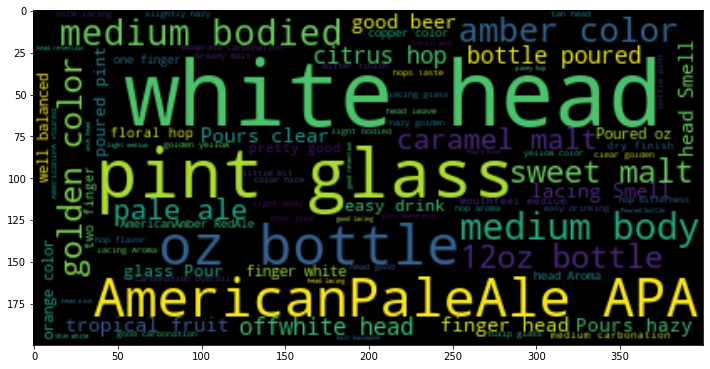

In [11]:
from wordcloud import WordCloud
#wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
wcloud = WordCloud().generate(out)
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(12,8))
plt.imshow(wcloud, interpolation='bilinear')
plt.show()

In [12]:
pandas_df3 = pandas_df[pandas_df['prediction']=='3']

In [13]:
out = ' '.join(pandas_df3["text"])

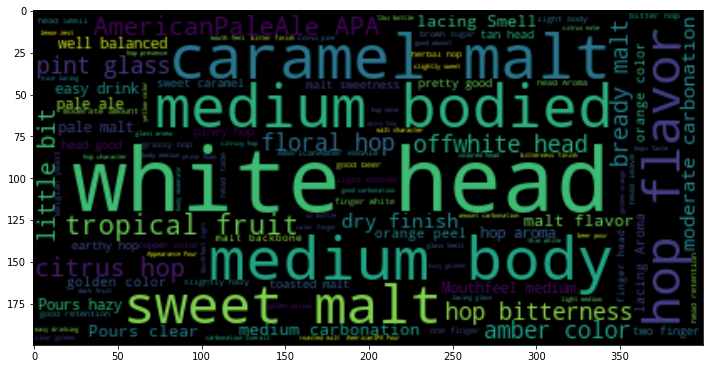

In [14]:
from wordcloud import WordCloud
#wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
wcloud = WordCloud().generate(out)
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(12,8))
plt.imshow(wcloud, interpolation='bilinear')
plt.show()

In [15]:
pandas_df2 = pandas_df[pandas_df['prediction']=='2']

In [16]:
out = ' '.join(pandas_df2["text"])

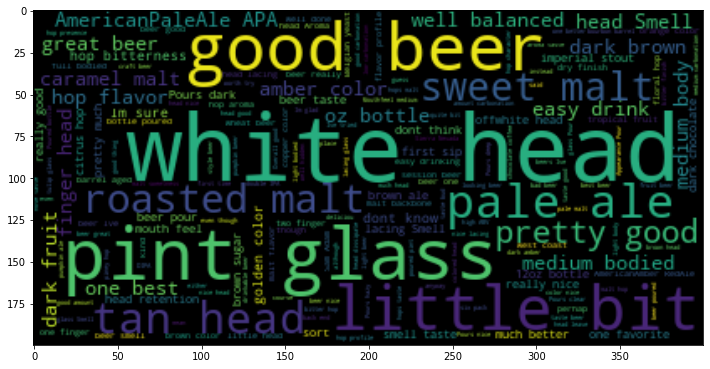

In [17]:
from wordcloud import WordCloud
#wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
wcloud = WordCloud().generate(out)
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(12,8))
plt.imshow(wcloud, interpolation='bilinear')
plt.show()

In [18]:
pandas_df4 = pandas_df[pandas_df['prediction']=='4']

In [19]:
out = ' '.join(pandas_df4["text"])

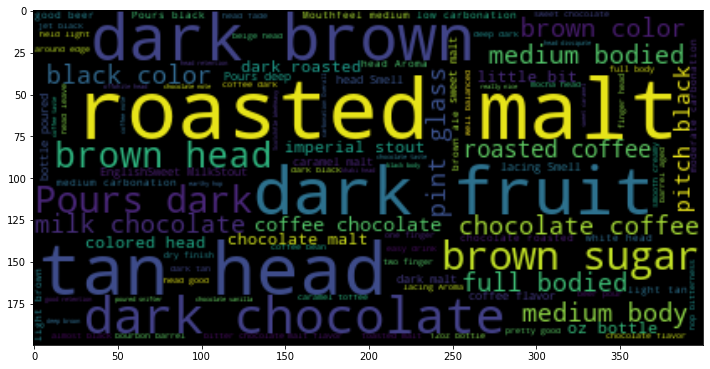

In [20]:
from wordcloud import WordCloud
#wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
wcloud = WordCloud().generate(out)
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(12,8))
plt.imshow(wcloud, interpolation='bilinear')
plt.show()

In [21]:
pandas_df1 = pandas_df[pandas_df['prediction']=='1']

In [22]:
out = ' '.join(pandas_df1["text"])

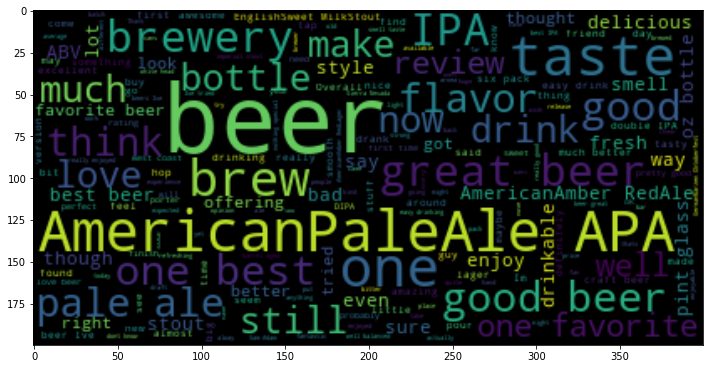

In [23]:
from wordcloud import WordCloud
#wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
wcloud = WordCloud().generate(out)
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(12,8))
plt.imshow(wcloud, interpolation='bilinear')
plt.show()